In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import re

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Data

##### We have  daily  sales data of different types of Winston cigarettes soled in the stores.
* Date - date of purchase
* INN - Id of shop
* Grand Total - Total sum of purchase by a store on a particular date

In [154]:
data= pd.read_csv("chort.csv", delimiter=';')

In [155]:
data.head()

,Date,INN,Winston Blue,Winston Classic,Winston Compact Purple Beat,Winston Silver,Winston SS Blue,Winston SS Impulse Blue,Winston SS Impulse Purple,Winston SS Silver,Winston SS White,Winston White,Winston XS Blue,Winston XS Plus Blue,Winston XS Plus Silver,Winston XS Silver,Winston XStyle Blue,Winston XStyle Silver,Grand Total
0,02.04.2021,66003665.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,10.0,40
1,06.04.2021,66003665.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,10.0,10.0,45
2,09.04.2021,66003665.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,10.0,10.0,10.0,65
3,13.04.2021,66003665.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,5.0,NaN,10.0,NaN,NaN,10.0,NaN,NaN,70
4,16.04.2021,66003665.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20


# Data Preprocessig 

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9599 entries, 0 to 9598
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         9599 non-null   object 
 1   INN                          8536 non-null   float64
 2   Winston Blue                 2026 non-null   float64
 3   Winston Classic              261 non-null    float64
 4   Winston Compact Purple Beat  410 non-null    float64
 5   Winston Silver               523 non-null    float64
 6   Winston SS Blue              2250 non-null   float64
 7   Winston SS Impulse Blue      290 non-null    float64
 8   Winston SS Impulse Purple    30 non-null     float64
 9   Winston SS Silver            1172 non-null   float64
 10  Winston SS White             2178 non-null   float64
 11  Winston White                444 non-null    float64
 12  Winston XS Blue              2301 non-null   float64
 13  Winston XS Plus Bl

In [157]:
data["Date"]=pd.to_datetime(data["Date"], format= '%d.%m.%Y')

In [158]:
data["INN"]=data["INN"].astype('O')

### Checking NAs

In [159]:
data.isna().sum()

Date                              0
INN                            1063
Winston Blue                   7573
Winston Classic                9338
Winston Compact Purple Beat    9189
Winston Silver                 9076
Winston SS Blue                7349
Winston SS Impulse Blue        9309
Winston SS Impulse Purple      9569
Winston SS Silver              8427
Winston SS White               7421
Winston White                  9155
Winston XS Blue                7298
Winston XS Plus Blue           8850
Winston XS Plus Silver         9391
Winston XS Silver              6708
Winston XStyle Blue            6218
Winston XStyle Silver          5484
Grand Total                       0
dtype: int64

In [160]:
data.dropna(subset=["INN"])

,Date,INN,Winston Blue,Winston Classic,Winston Compact Purple Beat,Winston Silver,Winston SS Blue,Winston SS Impulse Blue,Winston SS Impulse Purple,Winston SS Silver,Winston SS White,Winston White,Winston XS Blue,Winston XS Plus Blue,Winston XS Plus Silver,Winston XS Silver,Winston XStyle Blue,Winston XStyle Silver,Grand Total
0,2021-04-02,6.60037e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,10.0,40
1,2021-04-06,6.60037e+07,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,10.0,10.0,45
2,2021-04-09,6.60037e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,10.0,10.0,10.0,65
3,2021-04-13,6.60037e+07,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,5.0,NaN,10.0,NaN,NaN,10.0,NaN,NaN,70
4,2021-04-16,6.60037e+07,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9594,2021-04-26,5.73484e+07,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
9595,2021-04-26,8.04819e+07,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
9596,2021-04-26,5.72702e+07,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
9597,2021-04-27,5.7281e+07,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,15


In [161]:
data.describe()

,Winston Blue,Winston Classic,Winston Compact Purple Beat,Winston Silver,Winston SS Blue,Winston SS Impulse Blue,Winston SS Impulse Purple,Winston SS Silver,Winston SS White,Winston White,Winston XS Blue,Winston XS Plus Blue,Winston XS Plus Silver,Winston XS Silver,Winston XStyle Blue,Winston XStyle Silver,Grand Total
count,2026.000000,261.000000,410.000000,523.000000,2250.000000,290.000000,30.000000,1172.000000,2178.000000,444.000000,2301.000000,749.000000,208.000000,2891.000000,3381.000000,4115.000000,9599.000000
mean,10.331194,7.360153,8.568293,8.913958,12.100000,8.151724,9.900000,10.131399,10.542700,8.747748,10.542807,9.441923,8.591346,11.879626,11.858030,13.240826,45.172518
std,7.866440,3.756095,5.140231,6.245171,31.246709,4.774255,8.226744,6.169244,7.610419,4.909968,8.163840,10.899929,8.019380,9.152422,9.744667,11.599733,57.968841
min,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,4.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
25%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,6.000000,10.000000,15.000000
50%,10.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,30.000000
75%,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,52.500000
max,150.000000,40.000000,50.000000,100.000000,1010.000000,40.000000,50.000000,60.000000,150.000000,50.000000,200.000000,200.000000,100.000000,150.000000,200.000000,200.000000,1720.000000


### Dealing with outliers

In [162]:
def drop_outliers(df, field_name):
    distance = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > distance + np.percentile(df[field_name], 75)].index, inplace=True)
    df.drop(df[df[field_name] < np.percentile(df[field_name], 25) - distance].index, inplace=True)

In [163]:
col=['Winston Blue', 'Winston Classic',
       'Winston Compact Purple Beat', 'Winston Silver', 'Winston SS Blue',
       'Winston SS Impulse Blue', 'Winston SS Impulse Purple',
       'Winston SS Silver', 'Winston SS White', 'Winston White',
       'Winston XS Blue', 'Winston XS Plus Blue', 'Winston XS Plus Silver',
       'Winston XS Silver', 'Winston XStyle Blue', 'Winston XStyle Silver',
       'Grand Total']
for i in col:
    drop_outliers(data, i)

In [164]:
data.describe()

,Winston Blue,Winston Classic,Winston Compact Purple Beat,Winston Silver,Winston SS Blue,Winston SS Impulse Blue,Winston SS Impulse Purple,Winston SS Silver,Winston SS White,Winston White,Winston XS Blue,Winston XS Plus Blue,Winston XS Plus Silver,Winston XS Silver,Winston XStyle Blue,Winston XStyle Silver,Grand Total
count,1630.000000,185.000000,302.000000,394.000000,1874.000000,197.000000,27.000000,906.000000,1752.000000,352.000000,1871.000000,561.000000,143.000000,2368.000000,2812.000000,3471.000000,8793.000000
mean,8.660123,6.600000,7.450331,7.946701,9.250267,6.654822,8.407407,8.641280,8.890982,7.704545,8.998931,7.563280,6.685315,9.888514,9.720128,10.726880,32.862618
std,4.035578,3.693708,3.900232,3.963536,5.256152,3.087605,3.365655,3.803229,4.527988,2.824028,4.221159,3.715317,2.861644,5.564029,5.420777,6.919235,23.468335
min,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,4.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
25%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,6.000000,15.000000
50%,10.000000,5.000000,5.000000,10.000000,10.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,6.000000,5.000000,10.000000,10.000000,10.000000,25.000000
75%,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,45.000000
max,50.000000,40.000000,40.000000,45.000000,100.000000,20.000000,20.000000,30.000000,50.000000,22.000000,50.000000,50.000000,10.000000,60.000000,60.000000,100.000000,108.000000


# Data Visualisation

<AxesSubplot:xlabel='Winston XStyle Silver', ylabel='Probability'>

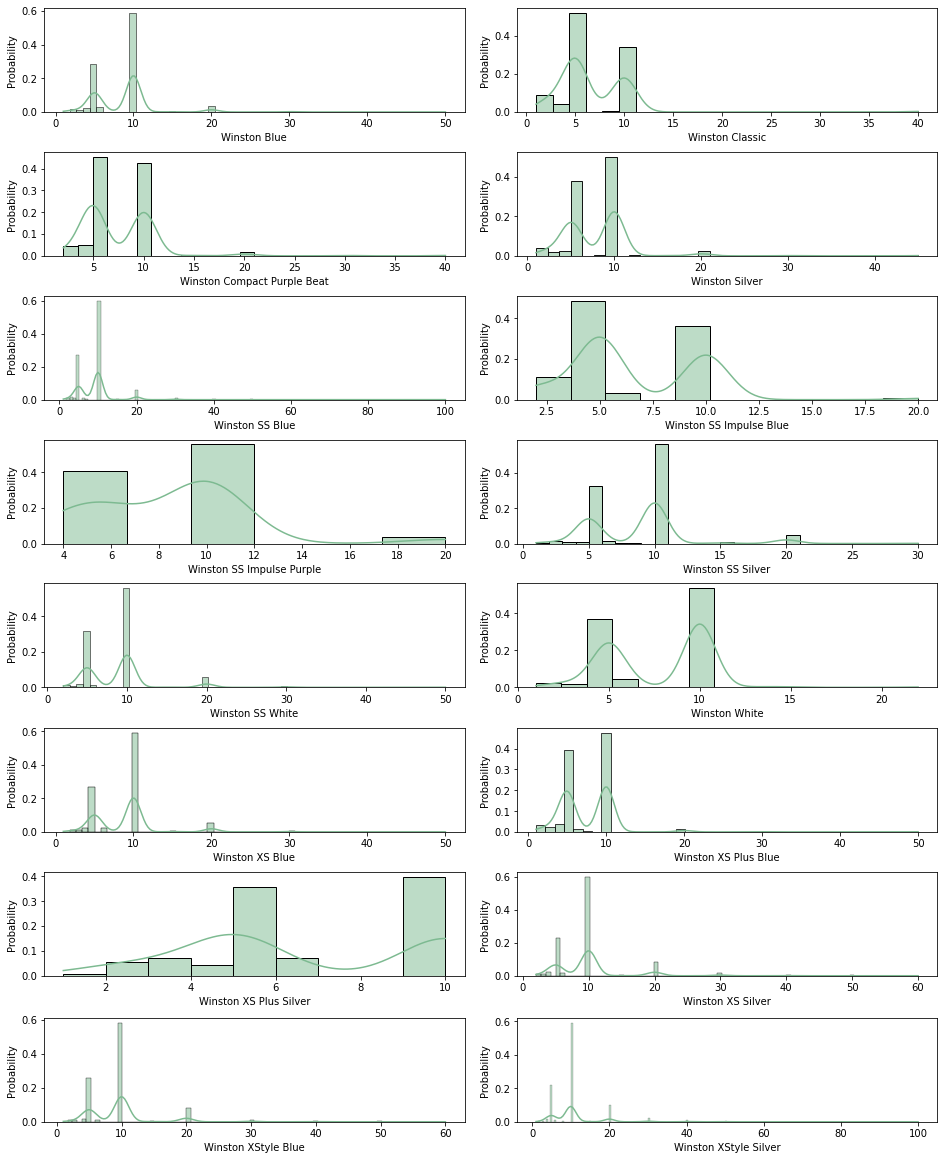

In [165]:
fig = plt.figure(constrained_layout=True, figsize = (13,16))
gs = fig.add_gridspec(8, 2)

ax1= fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])
ax7 = fig.add_subplot(gs[3, 0])
ax8 = fig.add_subplot(gs[3, 1])
ax9 = fig.add_subplot(gs[4, 0])
ax10 = fig.add_subplot(gs[4, 1])
ax11 = fig.add_subplot(gs[5, 0])
ax12 = fig.add_subplot(gs[5, 1])
ax13 = fig.add_subplot(gs[6, 0])
ax14 = fig.add_subplot(gs[6, 1])
ax15 = fig.add_subplot(gs[7, 0])
ax16 = fig.add_subplot(gs[7, 1])



sns.set_palette("crest")



sns.histplot(data, x = 'Winston Blue', kde = True,  stat = 'probability', ax = ax1)
sns.histplot(data, x = 'Winston Classic', kde = True,  stat = 'probability', ax = ax2)
sns.histplot(data, x = 'Winston Compact Purple Beat', kde = True,  stat = 'probability', ax = ax3)
sns.histplot(data, x = 'Winston Silver', kde = True,  stat = 'probability', ax = ax4)
sns.histplot(data, x = 'Winston SS Blue', kde = True,  stat = 'probability', ax = ax5)
sns.histplot(data, x = 'Winston SS Impulse Blue', kde = True,  stat = 'probability', ax = ax6)
sns.histplot(data, x = 'Winston SS Impulse Purple', kde = True,  stat = 'probability', ax = ax7)
sns.histplot(data, x = 'Winston SS Silver', kde = True,  stat = 'probability', ax = ax8)
sns.histplot(data, x = 'Winston SS White', kde = True,  stat = 'probability', ax = ax9)
sns.histplot(data, x = 'Winston White', kde = True,  stat = 'probability', ax = ax10)
sns.histplot(data, x = 'Winston XS Blue', kde = True,  stat = 'probability', ax = ax11)
sns.histplot(data, x = 'Winston XS Plus Blue', kde = True,  stat = 'probability', ax = ax12)
sns.histplot(data, x = 'Winston XS Plus Silver', kde = True,  stat = 'probability', ax = ax13)
sns.histplot(data, x = 'Winston XS Silver', kde = True,  stat = 'probability', ax = ax14)
sns.histplot(data, x = 'Winston XStyle Blue', kde = True,  stat = 'probability', ax = ax15)
sns.histplot(data, x = 'Winston XStyle Silver', kde = True,  stat = 'probability', ax = ax16)


In [166]:
new_data= data.groupby('INN').agg({'INN': 'count', 'Grand Total': 'sum'})
new_data["INN"]=new_data["INN"].astype(object)
new_data.columns=['Frequency', 'Sum',]

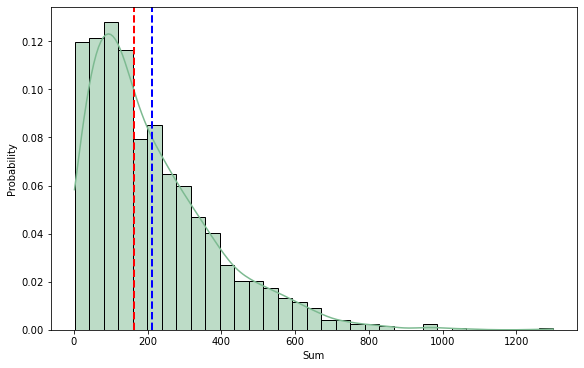

In [167]:
sns.set_palette("crest")
fig = plt.figure(constrained_layout=True, figsize = (8,5))
sns.histplot(new_data, x = 'Sum', kde = True,  stat = 'probability')
plt.axvline(new_data["Sum"].median(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(new_data["Sum"].mean(), color='b', linestyle='dashed', linewidth=2)

As we can see, mean and mode of sales are close to each other. So we are more likely to have skewed normal distribution of sales.

## Exploring interactions

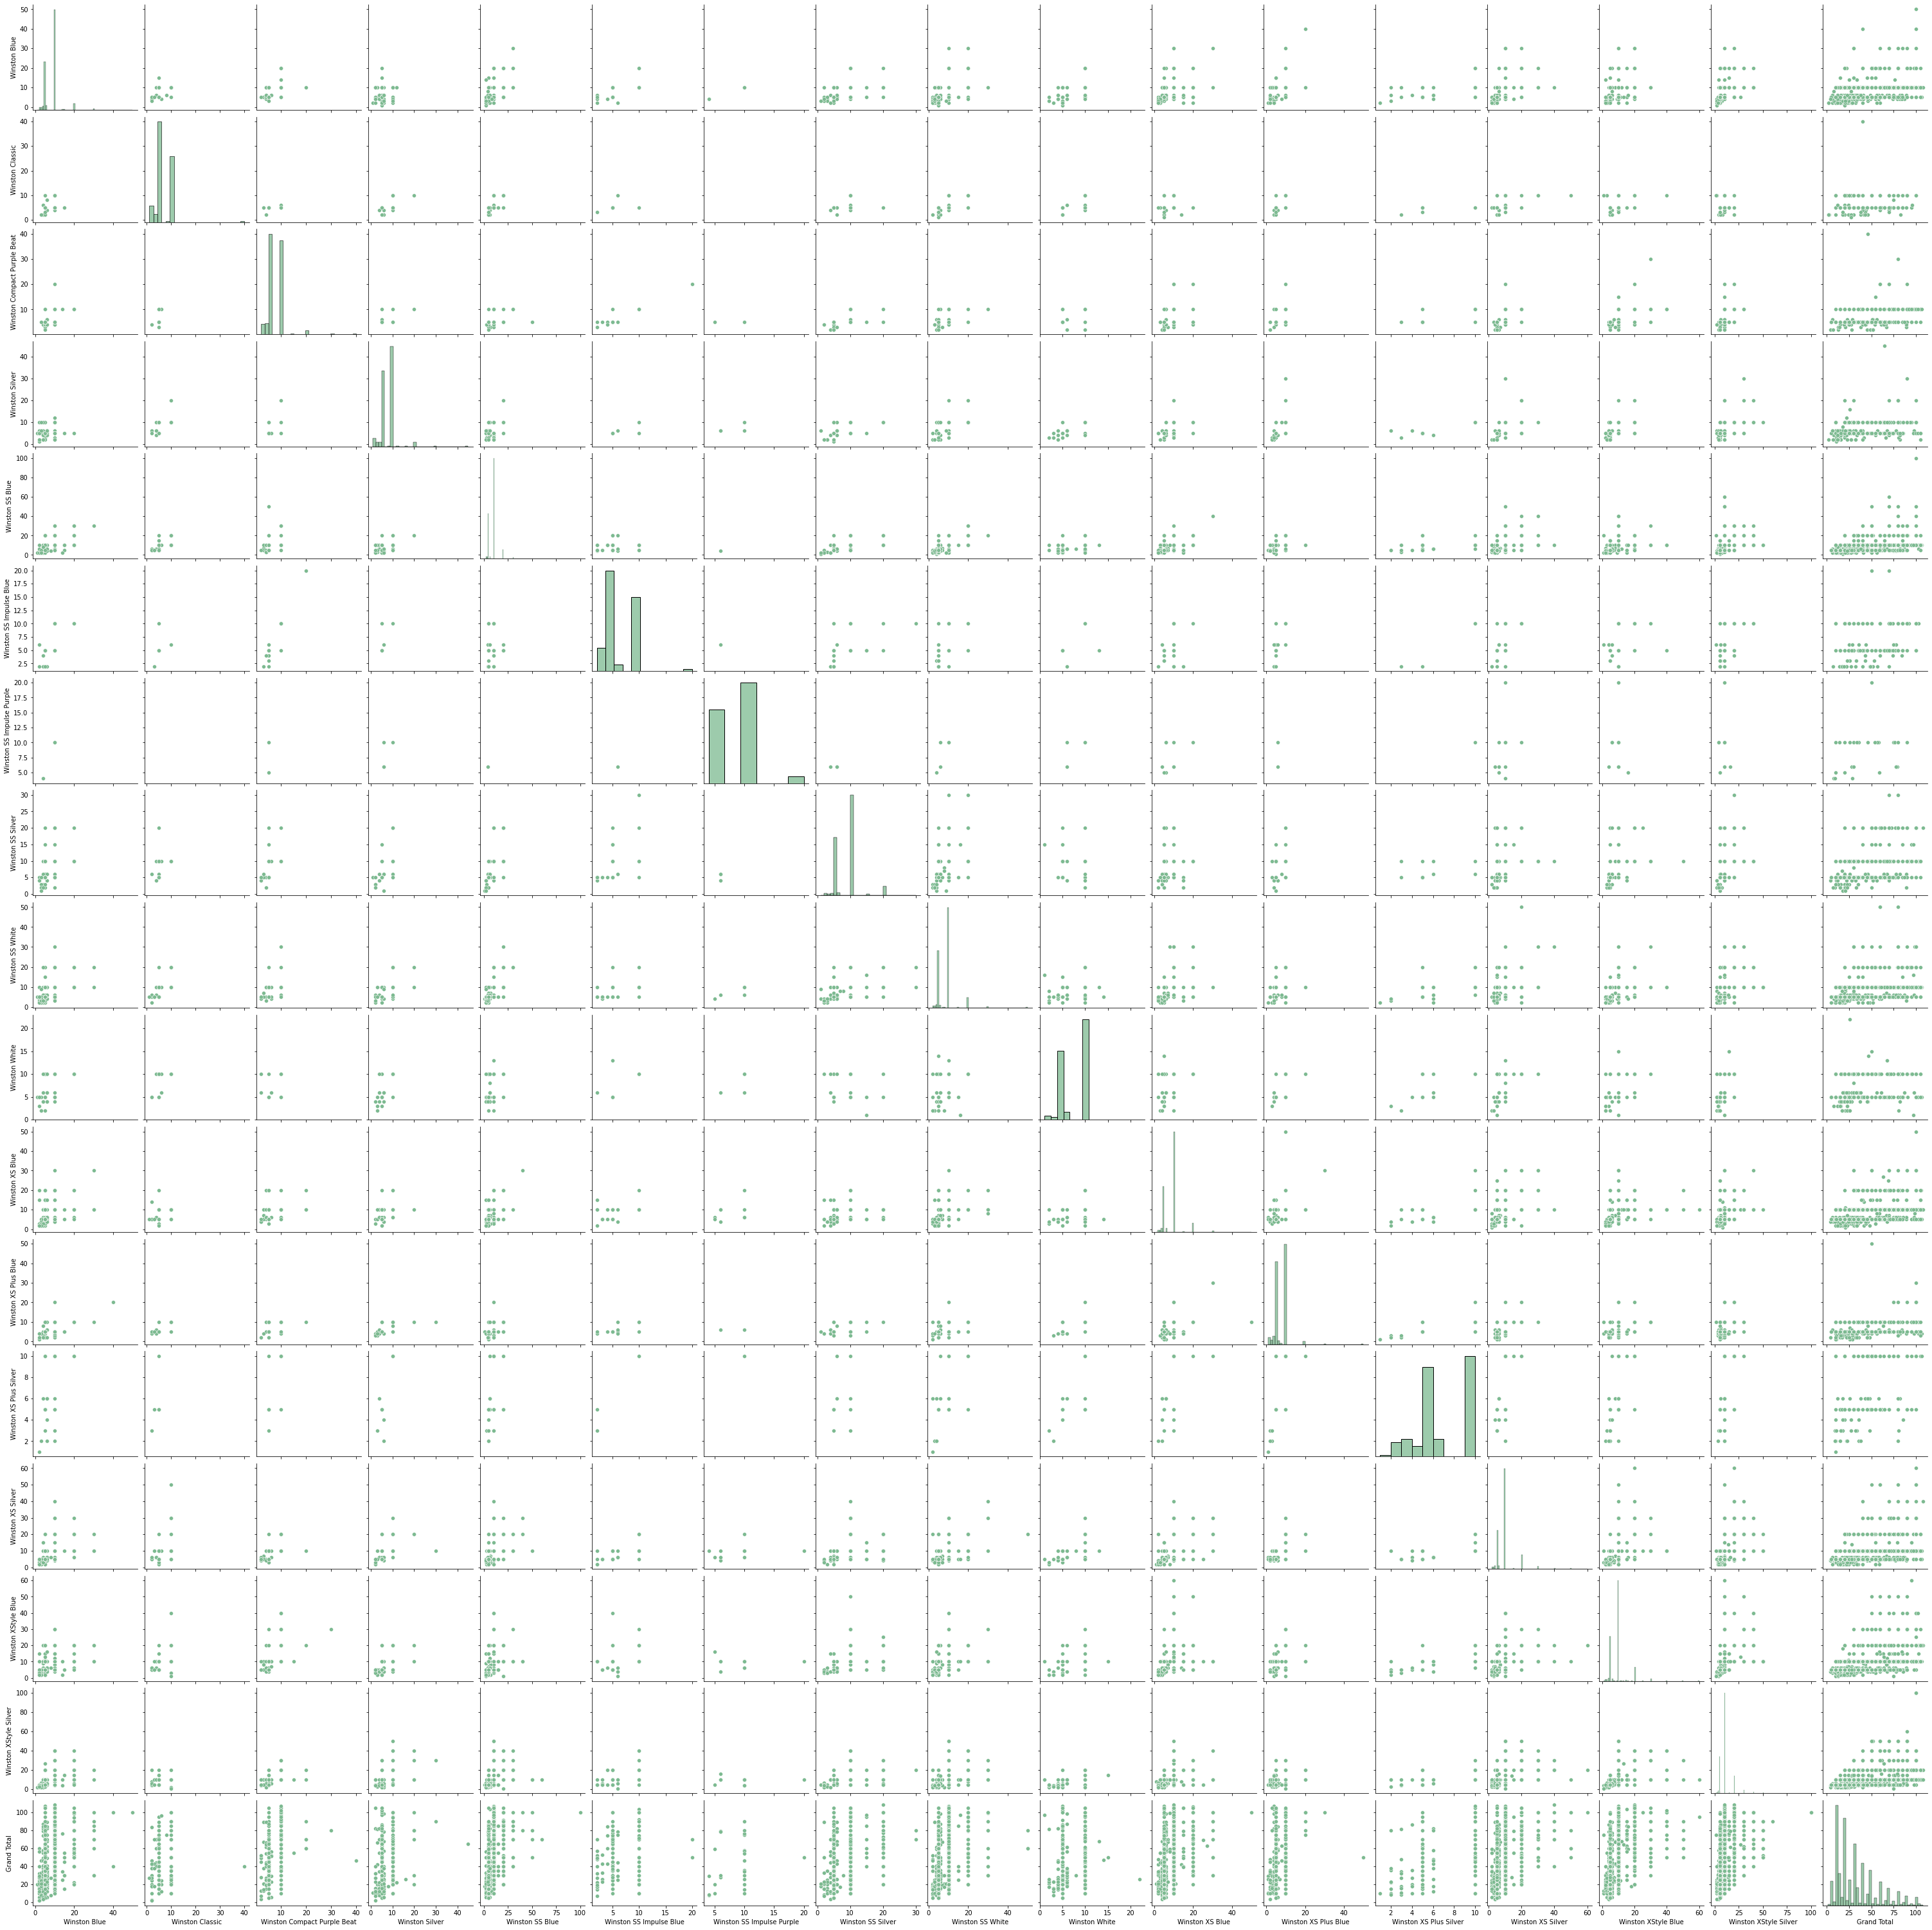

In [168]:
sns.pairplot(data, vars = col)

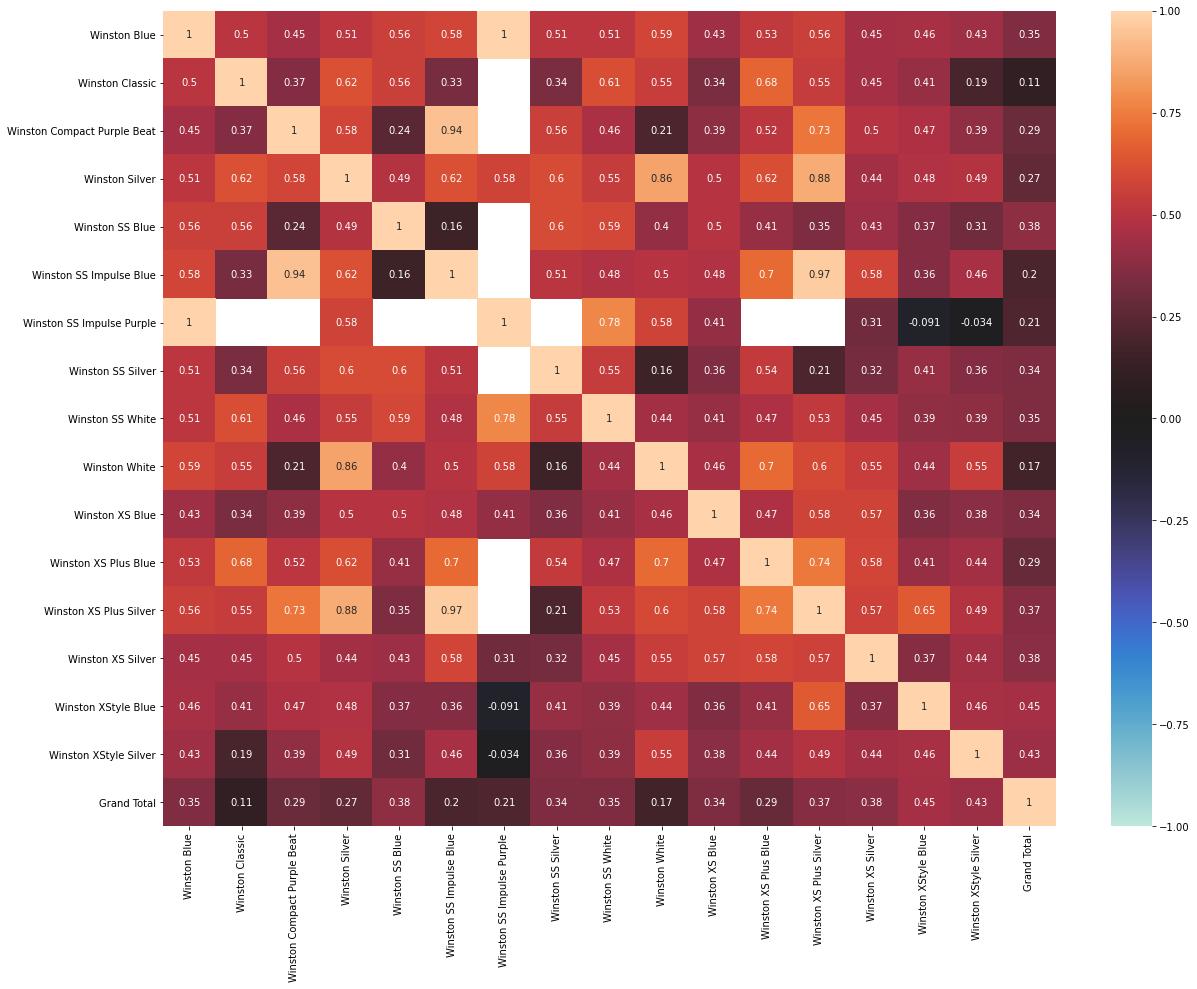

In [169]:
plt.figure(figsize = (20,15))
corr = data[col].corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=corr)

This heatmap shows correlation of sales for different types of cigarettes. As we can see, there are even with 1 correlation ones.  

# Analysis

### Chohort

In [170]:
gr_data=data.groupby(["INN", "Date"], as_index=False).agg({"Grand Total": 'sum'})

In [171]:
gr_data["INN"]=gr_data["INN"].astype("O")

In [172]:
gr_data.head()

,INN,Date,Grand Total
0,8171,2021-04-02,20
1,8171,2021-04-05,25
2,8171,2021-04-09,10
3,8171,2021-04-12,25
4,8171,2021-04-16,10


In [173]:
gr_data['first_date']=gr_data.groupby('INN')['Date'].transform('min')

In [174]:
gr_data.head()

,INN,Date,Grand Total,first_date
0,8171,2021-04-02,20,2021-04-02
1,8171,2021-04-05,25,2021-04-02
2,8171,2021-04-09,10,2021-04-02
3,8171,2021-04-12,25,2021-04-02
4,8171,2021-04-16,10,2021-04-02


In [175]:
gr_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7771 entries, 0 to 7770
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   INN          7771 non-null   object        
 1   Date         7771 non-null   datetime64[ns]
 2   Grand Total  7771 non-null   int64         
 3   first_date   7771 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 303.6+ KB


In [178]:
cohort=gr_data.groupby(['Date', 'first_date'], as_index=False).agg({'INN': 'count'})

In [179]:
cohort['Period']=cohort['Date']- cohort['first_date']
cohort.head()

,Date,first_date,INN,Period
0,2021-04-01,2021-04-01,272,0 days
1,2021-04-02,2021-04-01,11,1 days
2,2021-04-02,2021-04-02,255,0 days
3,2021-04-03,2021-04-01,63,2 days
4,2021-04-03,2021-04-02,5,1 days


In [181]:
cohort2=gr_data.groupby(['Date', 'first_date'], as_index=False).agg({'Grand Total': 'mean'})
cohort2['Period']=cohort2['Date']- cohort2['first_date']

cohort2.head()

,Date,first_date,Grand Total,Period
0,2021-04-01,2021-04-01,31.463235,0 days
1,2021-04-02,2021-04-01,35.272727,1 days
2,2021-04-02,2021-04-02,28.862745,0 days
3,2021-04-03,2021-04-01,35.126984,2 days
4,2021-04-03,2021-04-02,36.000000,1 days


In [182]:
cohort2['Date']=pd.to_datetime(cohort2['Date']).dt.date
cohort['Date']=pd.to_datetime(cohort['Date']).dt.date

In [183]:
pivot=cohort.pivot_table(index='first_date', columns = 'Period', values = 'INN')

In [184]:
pivot2=cohort2.pivot_table(index='first_date', columns = 'Period', values = 'Grand Total')

In [185]:
pivot

Period,0 days,1 days,2 days,3 days,4 days,5 days,6 days,7 days,8 days,9 days,...,20 days,21 days,22 days,23 days,24 days,25 days,26 days,27 days,28 days,29 days
first_date,,,,,,,,,,,,,,,,,,,,,
2021-04-01,272.0,11.0,63.0,3.0,149.0,46.0,4.0,214.0,14.0,56.0,...,8.0,223.0,15.0,68.0,4.0,153.0,48.0,6.0,214.0,18.0
2021-04-02,255.0,5.0,NaN,52.0,141.0,57.0,5.0,174.0,9.0,NaN,...,8.0,196.0,8.0,NaN,54.0,151.0,57.0,5.0,183.0,NaN
2021-04-03,196.0,NaN,23.0,21.0,126.0,24.0,2.0,150.0,NaN,26.0,...,2.0,151.0,NaN,22.0,22.0,127.0,24.0,4.0,NaN,NaN
2021-04-04,30.0,NaN,NaN,5.0,1.0,NaN,NaN,24.0,NaN,1.0,...,NaN,25.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
2021-04-05,85.0,1.0,17.0,30.0,7.0,5.0,NaN,60.0,6.0,14.0,...,NaN,57.0,5.0,13.0,35.0,20.0,NaN,NaN,NaN,NaN
2021-04-06,83.0,2.0,4.0,31.0,4.0,NaN,NaN,56.0,2.0,6.0,...,NaN,53.0,2.0,5.0,34.0,NaN,NaN,NaN,NaN,NaN
2021-04-07,127.0,NaN,4.0,20.0,NaN,7.0,NaN,72.0,1.0,7.0,...,NaN,82.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-08,27.0,NaN,NaN,2.0,5.0,1.0,NaN,9.0,NaN,2.0,...,1.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-09,29.0,NaN,NaN,NaN,10.0,2.0,NaN,12.0,NaN,NaN,...,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
pivot.index=pivot.index.astype(str)
pivot2.index=pivot2.index.astype(str)

In [188]:
pivot.columns=pivot.columns.astype(str)
pivot2.columns=pivot2.columns.astype(str)

#### Retantion matrix

In [189]:
size=pivot.iloc[:,0]
retantion=pivot.divide(size, axis=0)

In [190]:
retantion

Period,0 days,1 days,2 days,3 days,4 days,5 days,6 days,7 days,8 days,9 days,...,20 days,21 days,22 days,23 days,24 days,25 days,26 days,27 days,28 days,29 days
first_date,,,,,,,,,,,,,,,,,,,,,
2021-04-01,1.0,0.040441,0.231618,0.011029,0.547794,0.169118,0.014706,0.786765,0.051471,0.205882,...,0.029412,0.819853,0.055147,0.250000,0.014706,0.562500,0.176471,0.022059,0.786765,0.066176
2021-04-02,1.0,0.019608,NaN,0.203922,0.552941,0.223529,0.019608,0.682353,0.035294,NaN,...,0.031373,0.768627,0.031373,NaN,0.211765,0.592157,0.223529,0.019608,0.717647,NaN
2021-04-03,1.0,NaN,0.117347,0.107143,0.642857,0.122449,0.010204,0.765306,NaN,0.132653,...,0.010204,0.770408,NaN,0.112245,0.112245,0.647959,0.122449,0.020408,NaN,NaN
2021-04-04,1.0,NaN,NaN,0.166667,0.033333,NaN,NaN,0.800000,NaN,0.033333,...,NaN,0.833333,NaN,NaN,0.133333,NaN,NaN,NaN,NaN,NaN
2021-04-05,1.0,0.011765,0.200000,0.352941,0.082353,0.058824,NaN,0.705882,0.070588,0.164706,...,NaN,0.670588,0.058824,0.152941,0.411765,0.235294,NaN,NaN,NaN,NaN
2021-04-06,1.0,0.024096,0.048193,0.373494,0.048193,NaN,NaN,0.674699,0.024096,0.072289,...,NaN,0.638554,0.024096,0.060241,0.409639,NaN,NaN,NaN,NaN,NaN
2021-04-07,1.0,NaN,0.031496,0.157480,NaN,0.055118,NaN,0.566929,0.007874,0.055118,...,NaN,0.645669,NaN,0.039370,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-08,1.0,NaN,NaN,0.074074,0.185185,0.037037,NaN,0.333333,NaN,0.074074,...,0.037037,0.481481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-09,1.0,NaN,NaN,NaN,0.344828,0.068966,NaN,0.413793,NaN,NaN,...,NaN,0.413793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Period', ylabel='first_date'>

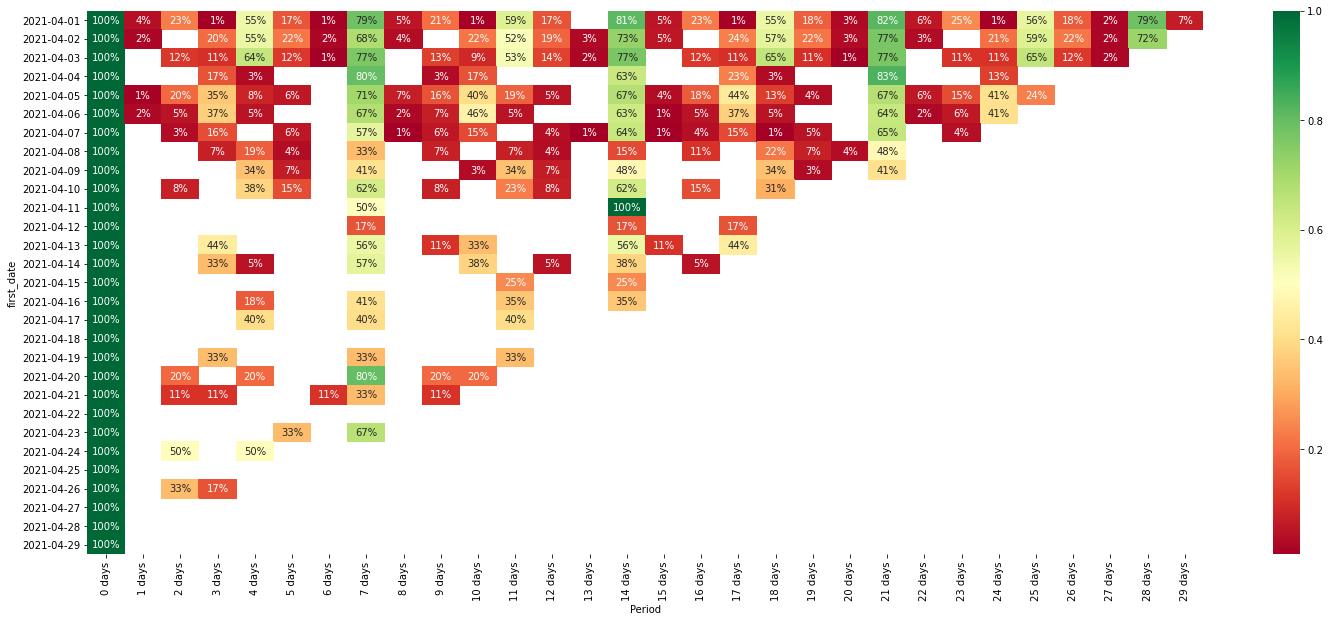

In [196]:
plt.figure(figsize=(25,10))
sns.heatmap(retantion, mask=pivot.isnull(), annot=True, cmap='RdYlGn',fmt='.0%')

In [193]:
size2=pivot2.iloc[:,0]
spending=pivot.divide(size, axis=0)
spending

Period,0 days,1 days,2 days,3 days,4 days,5 days,6 days,7 days,8 days,9 days,...,20 days,21 days,22 days,23 days,24 days,25 days,26 days,27 days,28 days,29 days
first_date,,,,,,,,,,,,,,,,,,,,,
2021-04-01,1.0,0.040441,0.231618,0.011029,0.547794,0.169118,0.014706,0.786765,0.051471,0.205882,...,0.029412,0.819853,0.055147,0.250000,0.014706,0.562500,0.176471,0.022059,0.786765,0.066176
2021-04-02,1.0,0.019608,NaN,0.203922,0.552941,0.223529,0.019608,0.682353,0.035294,NaN,...,0.031373,0.768627,0.031373,NaN,0.211765,0.592157,0.223529,0.019608,0.717647,NaN
2021-04-03,1.0,NaN,0.117347,0.107143,0.642857,0.122449,0.010204,0.765306,NaN,0.132653,...,0.010204,0.770408,NaN,0.112245,0.112245,0.647959,0.122449,0.020408,NaN,NaN
2021-04-04,1.0,NaN,NaN,0.166667,0.033333,NaN,NaN,0.800000,NaN,0.033333,...,NaN,0.833333,NaN,NaN,0.133333,NaN,NaN,NaN,NaN,NaN
2021-04-05,1.0,0.011765,0.200000,0.352941,0.082353,0.058824,NaN,0.705882,0.070588,0.164706,...,NaN,0.670588,0.058824,0.152941,0.411765,0.235294,NaN,NaN,NaN,NaN
2021-04-06,1.0,0.024096,0.048193,0.373494,0.048193,NaN,NaN,0.674699,0.024096,0.072289,...,NaN,0.638554,0.024096,0.060241,0.409639,NaN,NaN,NaN,NaN,NaN
2021-04-07,1.0,NaN,0.031496,0.157480,NaN,0.055118,NaN,0.566929,0.007874,0.055118,...,NaN,0.645669,NaN,0.039370,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-08,1.0,NaN,NaN,0.074074,0.185185,0.037037,NaN,0.333333,NaN,0.074074,...,0.037037,0.481481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-09,1.0,NaN,NaN,NaN,0.344828,0.068966,NaN,0.413793,NaN,NaN,...,NaN,0.413793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Period', ylabel='first_date'>

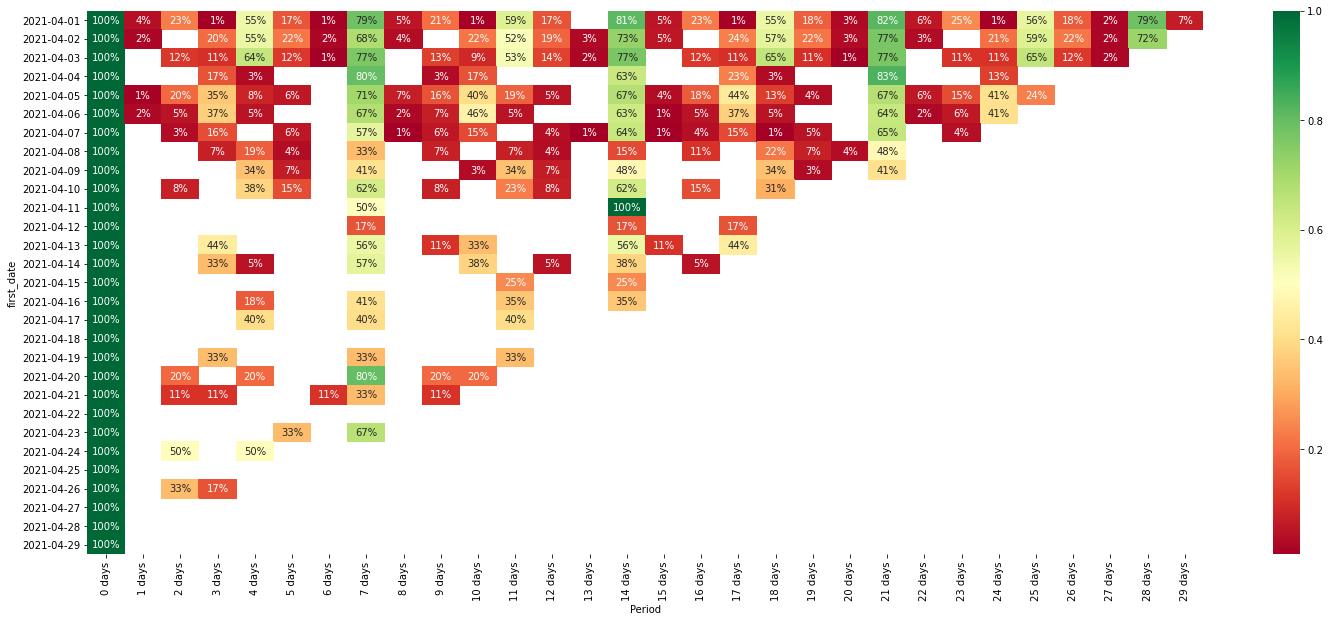

In [195]:
plt.figure(figsize=(25,10))
sns.heatmap(spending, mask=pivot.isnull(), annot=True, cmap='RdYlGn',fmt='.0%')

## RFM segmentation

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8793 entries, 0 to 9598
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         8793 non-null   datetime64[ns]
 1   INN                          7801 non-null   object        
 2   Winston Blue                 1630 non-null   float64       
 3   Winston Classic              185 non-null    float64       
 4   Winston Compact Purple Beat  302 non-null    float64       
 5   Winston Silver               394 non-null    float64       
 6   Winston SS Blue              1874 non-null   float64       
 7   Winston SS Impulse Blue      197 non-null    float64       
 8   Winston SS Impulse Purple    27 non-null     float64       
 9   Winston SS Silver            906 non-null    float64       
 10  Winston SS White             1752 non-null   float64       
 11  Winston White                352 non-null  

###### Last day of data is

In [116]:
print(data['Date'].max())

2021-04-30 00:00:00


###### Today  is

In [117]:
import datetime
now=pd.to_datetime(datetime.datetime(2021,5,1), format= '%d.%m.%Y')
print(now)

2021-05-01 00:00:00


###### RFM

In [118]:
rfm= data.groupby('INN').agg({'Date': lambda da: (now - da.max()).days, 'INN': 'count', 'Grand Total': 'sum'})
rfm["INN"]=rfm["INN"].astype(object)

In [119]:
rfm.columns=['recency', 'frequency', 'monetary',]
rfm.reset_index(inplace=True)
rfm.head()

,INN,recency,frequency,monetary
0,8171.0,1,9,245
1,8358.0,15,1,100
2,129884.0,2,5,260
3,550474.0,1,5,65
4,786328.0,1,6,100


In [120]:
rfm['INN']=rfm['INN'].astype(object)
rfm['frequency']=rfm['frequency'].astype(int)
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219 entries, 0 to 1218
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   INN        1219 non-null   object
 1   recency    1219 non-null   int64 
 2   frequency  1219 non-null   int32 
 3   monetary   1219 non-null   int64 
dtypes: int32(1), int64(2), object(1)
memory usage: 33.5+ KB


In [121]:
rfm.describe()

,recency,frequency,monetary
count,1219.000000,1219.000000,1219.000000
mean,4.737490,6.399508,212.091058
std,5.822356,3.511702,172.726339
min,1.000000,1.000000,2.000000
25%,2.000000,4.000000,85.000000
50%,3.000000,6.000000,162.000000
75%,5.000000,9.000000,300.000000
max,30.000000,23.000000,1300.000000


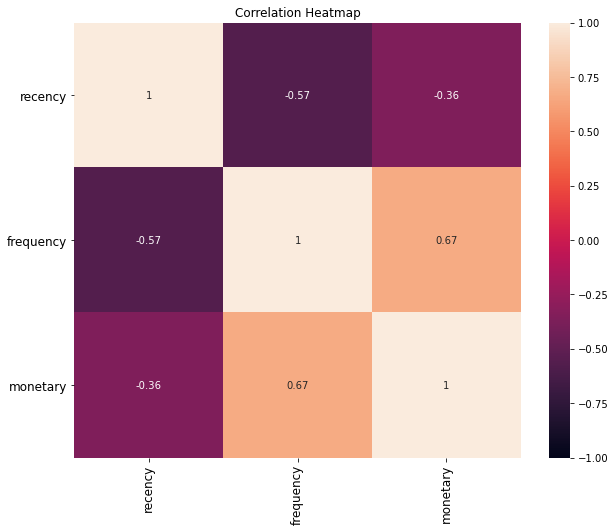

In [122]:
plt.figure(figsize = (10, 8))
s = sns.heatmap(rfm.corr(),
               annot = True, 
               vmin = -1, 
               vmax = 1)

s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Recency')

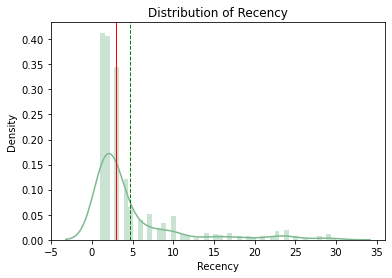

In [123]:
sns.distplot(rfm.recency)
plt.axvline(rfm.recency.mean(), color='g', linestyle='dashed', linewidth=1)
plt.axvline(rfm.recency.median(), color='r', linewidth=1)
plt.title('Distribution of Recency')
plt.xlabel("Recency")

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Frequency')

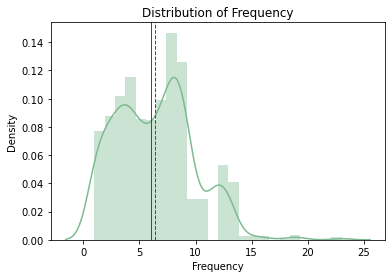

In [124]:
sns.distplot(rfm.frequency)
plt.axvline(rfm.frequency.mean(), color='g', linestyle='dashed', linewidth=1)
plt.axvline(rfm.frequency.median(), color='r', linewidth=1)
plt.title('Distribution of Frequency')
plt.xlabel("Frequency")

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Monetary value')

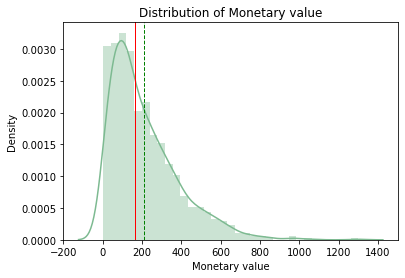

In [125]:
sns.distplot(rfm.monetary)
plt.axvline(rfm.monetary.mean(), color='g', linestyle='dashed', linewidth=1)
plt.axvline(rfm.monetary.median(), color='r', linewidth=1)
plt.title('Distribution of Monetary value')
plt.xlabel("Monetary value")

##### Compearing results

In [126]:
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, ['4','3', '2', '1']) 
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['4','3','2','1'])

In [127]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,INN,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
0,8171,1,9,245,1,2,2,122
1,8358,15,1,100,4,4,3,443
2,129884,2,5,260,1,3,2,132
3,550474,1,5,65,1,3,4,134
4,786328,1,6,100,1,3,3,133


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top 5 largest segments')

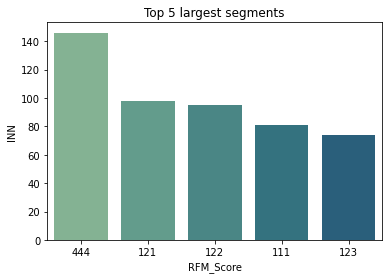

In [128]:
results = rfm.groupby('RFM_Score', as_index=False).INN.count().sort_values('INN', ascending=False)

tops = results.head(5)
sns.barplot(tops.RFM_Score, tops.INN)
plt.title('Top 5 largest segments')

# Segmentation with Clustering

In [129]:
scaler = StandardScaler()
cl_data = rfm.drop(columns=['INN', 'r_quartile', 'f_quartile', 'm_quartile', 'RFM_Score'] )
data_stand = scaler.fit_transform(cl_data)

In [130]:
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i,  random_state = 7)
    kmeans.fit(data_stand)
    wcss.append(kmeans.inertia_)

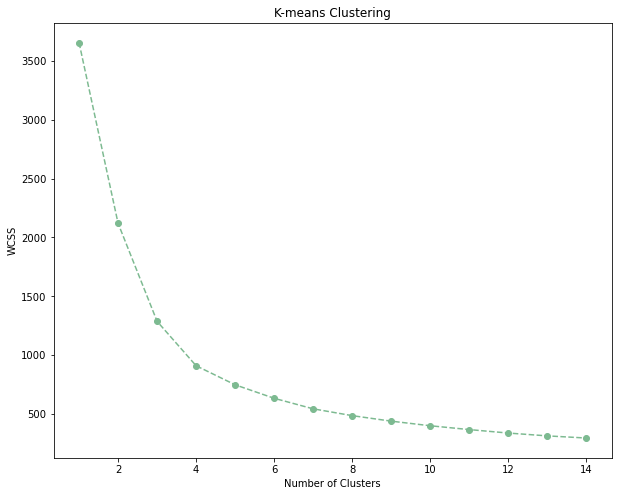

In [131]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 15), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [132]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 7)
kmeans.fit(data_stand)

KMeans(n_clusters=4, random_state=7)

In [133]:
cl_data

,recency,frequency,monetary
0,1,9,245
1,15,1,100
2,2,5,260
3,1,5,65
4,1,6,100
...,...,...,...
1214,2,6,50
1215,2,12,545
1216,2,9,240
1217,5,8,575


In [134]:
segm_data= cl_data.copy()
segm_data['Segments'] = kmeans.labels_
segm_data.head()

,recency,frequency,monetary,Segments
0,1,9,245,2
1,15,1,100,3
2,2,5,260,2
3,1,5,65,0
4,1,6,100,0


In [135]:
segm_data.describe()

,recency,frequency,monetary,Segments
count,1219.000000,1219.000000,1219.000000,1219.000000
mean,4.737490,6.399508,212.091058,1.219852
std,5.822356,3.511702,172.726339,1.046175
min,1.000000,1.000000,2.000000,0.000000
25%,2.000000,4.000000,85.000000,0.000000
50%,3.000000,6.000000,162.000000,1.000000
75%,5.000000,9.000000,300.000000,2.000000
max,30.000000,23.000000,1300.000000,3.000000


In [136]:
gr_segm= segm_data.groupby(['Segments'], as_index=False).mean()
gr_segm

,Segments,recency,frequency,monetary
0,0,4.609756,3.796009,107.261641
1,1,2.181250,10.943750,549.287500
2,2,2.052314,8.366197,232.802817
3,3,20.963964,1.621622,59.234234


In [137]:
#Create new columns: Segment size and Segment proportion 
gr_segm['Count'] = segm_data.groupby(['Segments'])['Segments'].count()
gr_segm['%Total'] = round(gr_segm['Count'] / gr_segm['Count'].sum() * 100, 2)

# Add the segment labels to our table
gr_segm['Segments'] = gr_segm['Segments'].map({0:'not bad', 
                                                   1:'our best',
                                                   2:'higth potential', 
                                                   3:'bad'})

gr_segm

,Segments,recency,frequency,monetary,Count,%Total
0,not bad,4.609756,3.796009,107.261641,451,37.00
1,our best,2.181250,10.943750,549.287500,160,13.13
2,higth potential,2.052314,8.366197,232.802817,497,40.77
3,bad,20.963964,1.621622,59.234234,111,9.11


In [138]:
segm_data['Segments'] = segm_data['Segments'].map({0:'not bad', 
                                                   1:'our best',
                                                   2:'higth potential', 
                                                   3:'bad'})

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


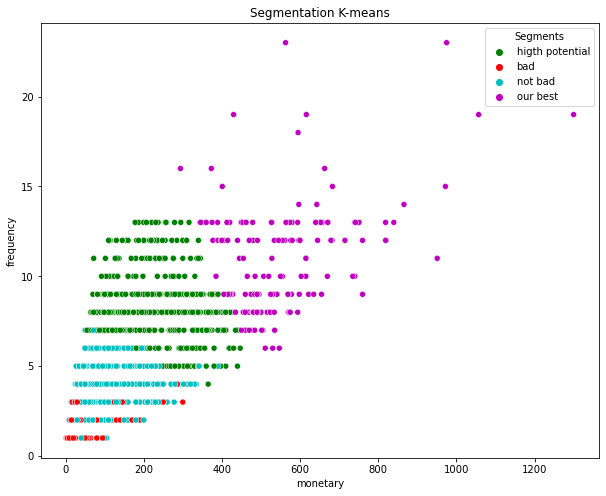

In [141]:
x_axis = segm_data['monetary']
y_axis = segm_data['frequency']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = segm_data['Segments'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


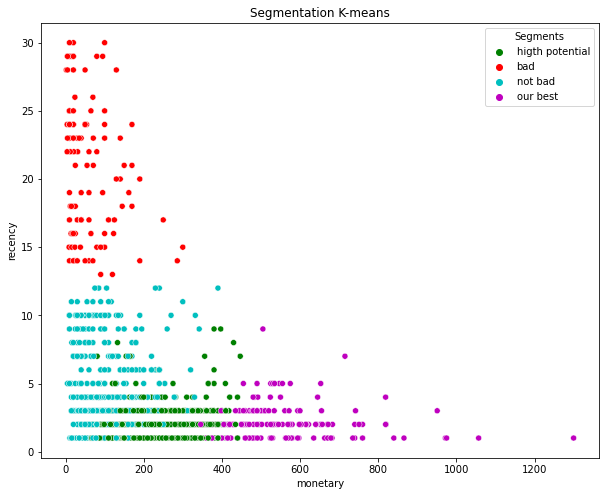

In [71]:
x_axis = segm_data['monetary']
y_axis = segm_data['recency']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = segm_data['Segments'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


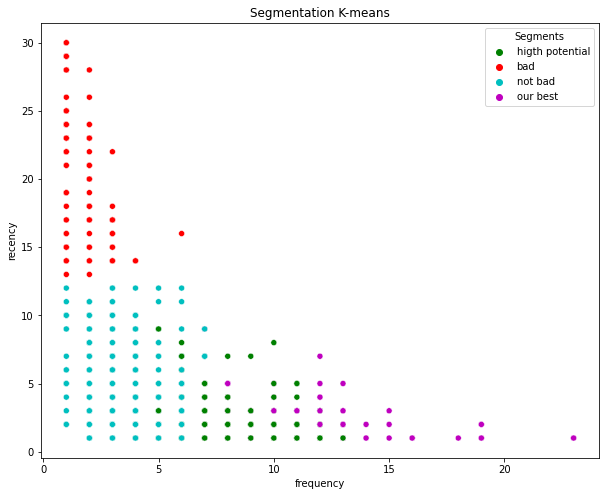

In [72]:
x_axis = segm_data['frequency']
y_axis = segm_data['recency']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = segm_data['Segments'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()

# Thank you)